In [62]:
import pandas as pd
import thinkplot
import thinkstats2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import Holt

import paygap

Find median weekly income and calculate proportion of women workers for each occupation. Data from CPS and BLS. 

Read in data

In [63]:
df_2018_raw = pd.read_excel('../Data/weeklyincome_occupation_gender_2018.xlsx')

In [64]:
df_2018_raw.head()

,Occupation,Total Number of workers,Total Median weekly earnings,Men Number of workers,Men Median weekly earnings,Women Number of workers,Women Median weekly earnings
0,"Total, full-time wage and salary workers",115567.0,886,64142.0,973,51425.0,789
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Management, professional, and related occupations",48808.0,1246,23685.0,1468,25123.0,1078
3,"Management, business, and financial operations...",19863.0,1355,10668.0,1537,9195.0,1168
4,Management occupations,13477.0,1429,7754.0,1585,5724.0,1236


Only select for the weekly pays that are not spaces (the spaces are the result of me replacing '-' with ' ' in Excel)

In [65]:
df_2018_raw.replace(' ', np.nan, inplace=True)

Remove NaNs that occur between types of occupations

In [66]:
df_2018_raw = df_2018_raw.dropna()
df_2018_raw.head()

,Occupation,Total Number of workers,Total Median weekly earnings,Men Number of workers,Men Median weekly earnings,Women Number of workers,Women Median weekly earnings
0,"Total, full-time wage and salary workers",115567.0,886.0,64142.0,973.0,51425.0,789.0
2,"Management, professional, and related occupations",48808.0,1246.0,23685.0,1468.0,25123.0,1078.0
3,"Management, business, and financial operations...",19863.0,1355.0,10668.0,1537.0,9195.0,1168.0
4,Management occupations,13477.0,1429.0,7754.0,1585.0,5724.0,1236.0
5,Chief executives,1098.0,2291.0,790.0,2488.0,307.0,1736.0


Convert type from object to float

In [67]:
df_2018 = df_2018_raw.copy()
for col in df_2018.columns:
    if col != 'Occupation':
        df_2018[col] = df_2018_raw[col].astype(float)

df_2018.dtypes

Occupation                       object
Total Number of workers         float64
Total Median weekly earnings    float64
Men Number of workers           float64
Men Median weekly earnings      float64
Women Number of workers         float64
Women Median weekly earnings    float64
dtype: object

Calculate the proportion of females in each occupation and store in Series

In [68]:
female_props = (df_2018['Women Number of workers']/df_2018['Total Number of workers'])*100
female_props.head()

0    44.497997
2    51.473119
3    46.292101
4    42.472360
5    27.959927
dtype: float64

Create a new DataFrame that just contains the occupation, median weekly income, and proportion of females

In [69]:
d = {'Occupation': df_2018['Occupation'], 
     'Weekly Pay': df_2018['Total Median weekly earnings'], 
     'Percent Female': female_props}
df_2018_result = pd.DataFrame(d)
df_2018_result.head()

,Occupation,Weekly Pay,Percent Female
0,"Total, full-time wage and salary workers",886.0,44.497997
2,"Management, professional, and related occupations",1246.0,51.473119
3,"Management, business, and financial operations...",1355.0,46.292101
4,Management occupations,1429.0,42.472360
5,Chief executives,2291.0,27.959927


Sort the DataFrame rows by weekly incomes with the higher incomes at the top

In [70]:
df_2018_result = df_2018_result.sort_values(by=['Weekly Pay'], ascending=False)

Display results for highest paid occupations

In [71]:
highest = paygap.ShowTableResult(df_2018_result[:10], title='Percentage of female employees in the 10 highest-paid occupations in America by median weekly pay for full-time workers, 2017.')
highest

Occupation,Weekly Pay,Percent Female
Chief executives,"$2,291",27.96%
Pharmacists,"$2,071",62.74%
Physicians and surgeons,"$2,001",42.56%
Lawyers,"$1,947",40.33%
Computer and information systems managers,"$1,877",25.46%
"Software developers, applications and systems software","$1,864",20.30%
Computer programmers,"$1,591",21.26%
"Engineers, all other","$1,575",12.31%
Marketing and sales managers,"$1,567",46.42%
Computer and mathematical occupations,"$1,539",24.90%


Display results for lowest paid occupations

In [98]:
lowest = paygap.ShowTableResult(df_2018_result[-10:], title='Percentage of female employees in the 10 lowest-paid occupations in America by median weekly pay for full-time workers, 2017.')
lowest

Occupation,Weekly Pay,Percent Female
Food preparation and serving related occupations,$501,49.70%
Personal care aides,$500,83.21%
Waiters and waitresses,$496,65.56%
"Packers and packagers, hand",$495,58.16%
Cooks,$486,39.32%
Maids and housekeeping cleaners,$467,87.64%
Cashiers,$465,72.88%
Food preparation workers,$463,56.45%
Dining room and cafeteria attendants and bartender helpers,$447,49.15%
"Combined food preparation and serving workers, including fast food",$436,56.46%


### Plot women's median weekly earnings as a share of white men's over time for different races. Data from CPS.

Read in the data, each row corresponds to a particular gender and race

In [73]:
df_race_raw = pd.read_excel('../Data/weeklyincome_gender_race_1979to2018.xlsx')

In [74]:
df_race_raw.head()

,Series ID,Annual 1979,Annual 1980,Annual 1981,Annual 1982,Annual 1983,Annual 1984,Annual 1985,Annual 1986,Annual 1987,...,Annual 2009,Annual 2010,Annual 2011,Annual 2012,Annual 2013,Annual 2014,Annual 2015,Annual 2016,Annual 2017,Annual 2018
0,LEU0252883900,298.0,320.0,350.0,375.0,387.0,401.0,418.0,433.0,450.0,...,845,850,856,879,884,897,920,942,971,1002
1,LEU0252884200,184.0,203.0,221.0,242.0,254.0,268.0,281.0,294.0,307.0,...,669,684,703,710,722,734,743,766,795,817
2,LEU0252885100,169.0,185.0,206.0,217.0,232.0,241.0,252.0,264.0,276.0,...,582,592,595,599,606,611,615,641,657,654
3,LEU0254468600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,779,773,751,770,819,841,877,902,903,937
4,LEU0252886000,157.0,172.0,190.0,203.0,215.0,223.0,230.0,241.0,251.0,...,509,508,518,521,541,548,566,586,603,617


Generate year range and extract the values of the white male income row

In [75]:
years = np.arange(1979, 2019)
years

array([1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [76]:
white_male_income = df_race_raw.loc[0].values[1:]
white_male_income

array([298.0, 320.0, 350.0, 375.0, 387.0, 401.0, 418.0, 433.0, 450.0,
       465.0, 482.0, 494.0, 506.0, 514.0, 524.0, 547.0, 566.0, 580.0,
       595.0, 615.0, 638.0, 662, 689, 702, 715, 732, 743, 761, 788, 825,
       845, 850, 856, 879, 884, 897, 920, 942, 971, 1002], dtype=object)

Find proportions of female median weekly income to male median weekly income for each year and race

In [77]:
white_female_income_prop = df_race_raw.loc[1].values[1:]/white_male_income
black_female_income_prop = df_race_raw.loc[2].values[1:]/white_male_income
asian_female_income_prop = df_race_raw.loc[3].values[1:]/white_male_income
hispanic_female_income_prop = df_race_raw.loc[4].values[1:]/white_male_income

Create another DataFrame with calculated values

In [78]:
d = {'Years': years, 
     'Asian Women': asian_female_income_prop.astype(float), 
     'White Women': white_female_income_prop.astype(float), 
     'Black Women': black_female_income_prop.astype(float), 
     'Hispanic Women': hispanic_female_income_prop.astype(float)}
df_race = pd.DataFrame(d)
df_race.head()

,Years,Asian Women,White Women,Black Women,Hispanic Women
0,1979,NaN,0.617450,0.567114,0.526846
1,1980,NaN,0.634375,0.578125,0.537500
2,1981,NaN,0.631429,0.588571,0.542857
3,1982,NaN,0.645333,0.578667,0.541333
4,1983,NaN,0.656331,0.599483,0.555556


Plot the columns of the new DataFrame

In [79]:
df_race.Years.max()

2018

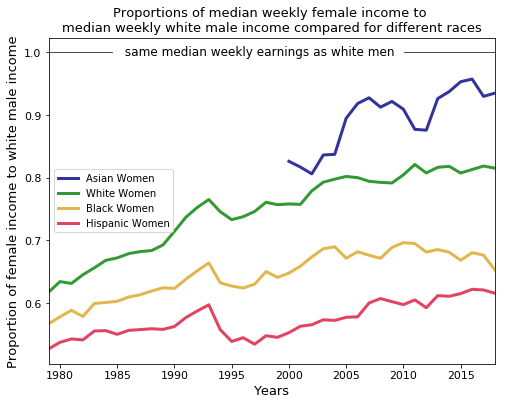

<Figure size 576x432 with 0 Axes>

In [80]:
fig, ax = plt.subplots(figsize=(8,6))

colors = ['crimson', 'goldenrod', 'green', 'navy']
predictions = {}
for col in df_race:
    if col != 'Years':
        color = colors.pop()
        thinkplot.Plot(df_race['Years'], df_race[col], label=col, color=color, alpha=0.8)

xs = np.arange(years.min(), years.max() + 1)
thinkplot.Plot(xs, np.zeros(len(xs)) + 1, color='black', lineWidth=1)
plt.text(1985, 0.995, '  same median weekly earnings as white men ', bbox=dict(facecolor='white', alpha=1, edgeColor='white'), fontsize=12)
thinkplot.Config(xlim=(xs.min(), xs.max()),
                 xlabel='Years', 
                 ylabel='Proportion of female income to white male income', 
                 title='Proportions of median weekly female income to \nmedian weekly white male income compared for different races')
thinkplot.set_font_size(13, 13, 11, 11)
thinkplot.Show()

In [81]:
fig.savefig("proportion-female-to-male-income", quality=100, dpi=200)

## Prediction

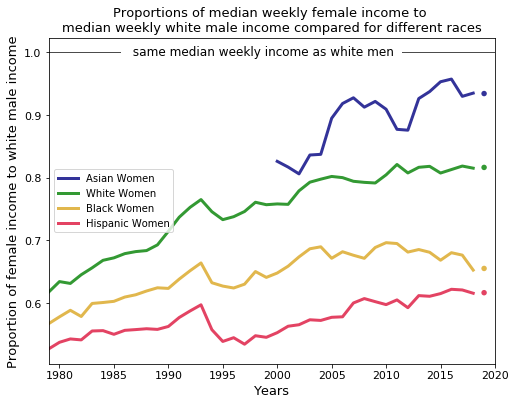

<Figure size 576x432 with 0 Axes>

In [82]:
fig, ax = plt.subplots(figsize=(8,6))

colors = ['crimson', 'goldenrod', 'green', 'navy']
predictions = {}
for col in df_race:
    if col != 'Years':
        y = df_race[col].dropna()
        y.index -= y.index.min() # Re-start index at 0
        fit = Holt(y, damped=True, exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
        fcast = fit.predict(len(y))
        predictions[col]= fcast
        
        color = colors.pop()
        thinkplot.Plot(df_race['Years'], df_race[col], label=col, color=color, alpha=0.8)
        thinkplot.Scatter([2019], predictions[col], color=color, alpha=0.8)

xs = np.arange(years.min(), years.max() + 3)
thinkplot.Plot(xs, np.zeros(len(xs)) + 1, color='black', lineWidth=1)
plt.text(1986, 0.995, '  same median weekly income as white men ', bbox=dict(facecolor='white', alpha=1, edgeColor='white'), fontsize=12)
thinkplot.Config(xlim=(xs.min(), xs.max()),
                 xlabel='Years', 
                 ylabel='Proportion of female income to white male income', 
                 title='Proportions of median weekly female income to \nmedian weekly white male income compared for different races')
thinkplot.set_font_size(13, 13, 11, 11)
thinkplot.Show()

## Explore space

In [83]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.formula.api as smf
import statsmodels.api as sm

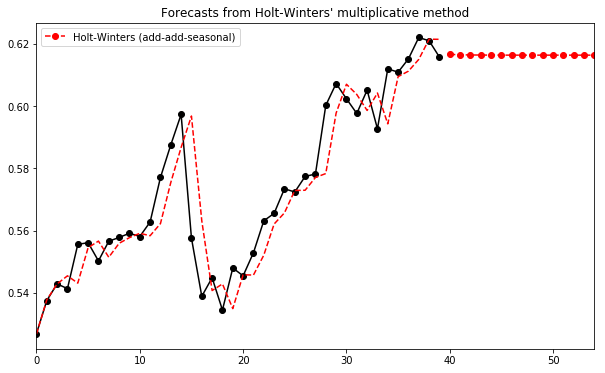

In [84]:
ax = y.plot(figsize=(10,6), marker='o', color='black', title="Forecasts from Holt-Winters' multiplicative method" )
fit1 = Holt(y, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
fit1.fittedvalues.plot(ax=ax, style='--', color='red')
fit1.forecast(15).rename('Holt-Winters (add-add-seasonal)').plot(ax=ax, style='--', marker='o', color='red', legend=True)
plt.show()

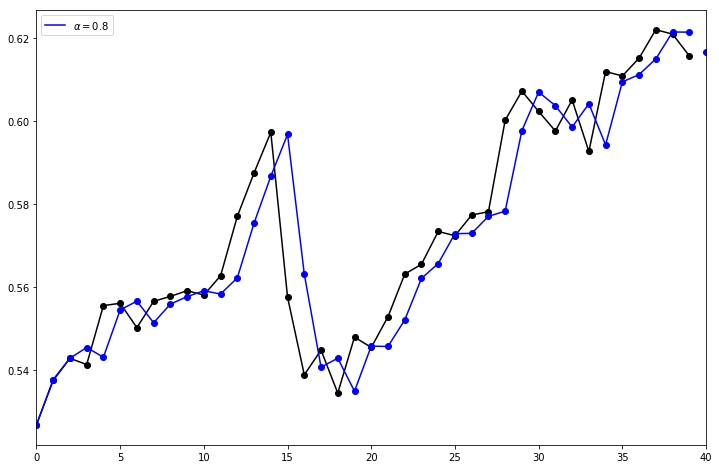

In [85]:
fit1 = Holt(y, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
fcast1 = fit1.forecast(1).rename(r'$\alpha=%s$'%fit1.model.params['smoothing_level'])

ax = y.plot(marker='o', color='black', figsize=(12,8))
fcast1.plot(marker='o', ax=ax, color='blue', legend=True)
fit1.fittedvalues.plot(marker='o', ax=ax, color='blue')

In [86]:
# ARMA example
y = df_race['Black Women'].copy()
y.index += df_race.Years.min()
# fit model
model = ARMA(y.astype(float), order=(2, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(y), len(y)+2)
print(yhat)

2019    0.649697
2020    0.650346
2021    0.647944
dtype: float64


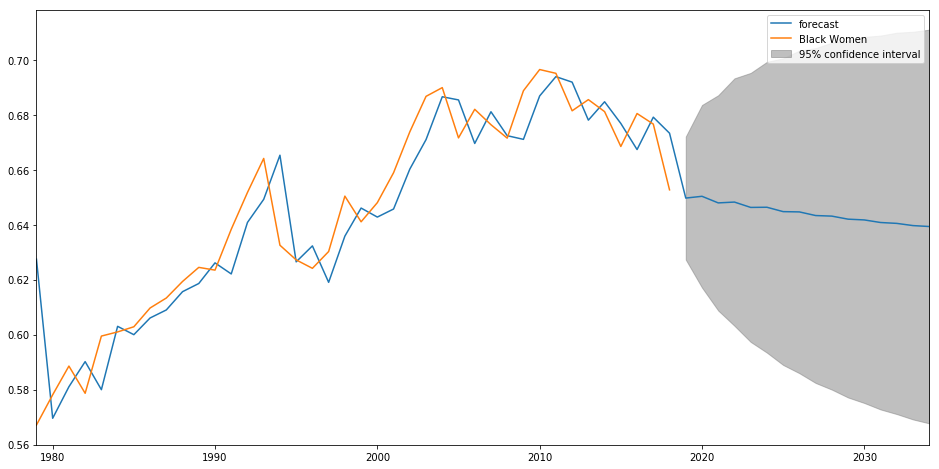

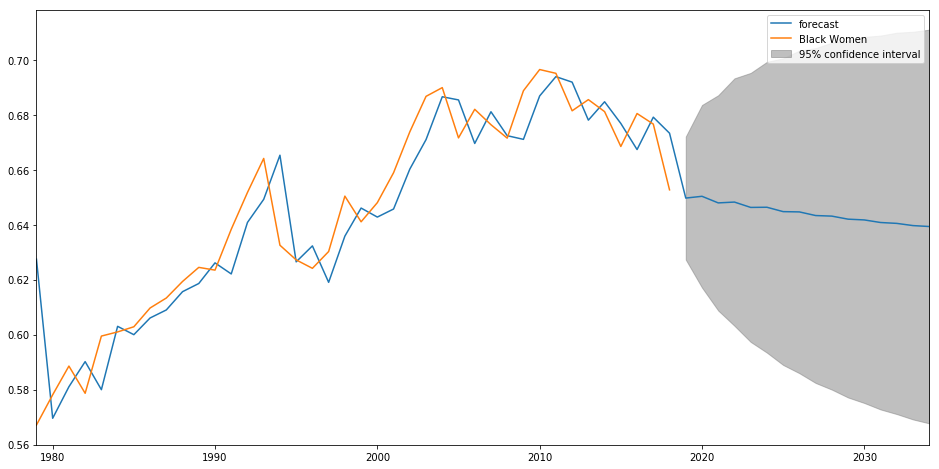

In [87]:
fig, ax = plt.subplots(figsize=(16,8))
model_fit.plot_predict(start=0, end=55, ax=ax)

In [88]:
# data = pd.Series(df_race['white_women'], df_race['Years'])
# data.index = data.Years
# index= pd.date_range(start=np.min(df_race['Years']), end=np.max(df_race['Years']), freq='A')
# df_race.index = index
fit1 = SimpleExpSmoothing(df_race['White Women'].astype(float)).fit(smoothing_level=0.6,optimized=False)
fcast1 = fit1.forecast(10).rename(r'$\alpha=0.6$')

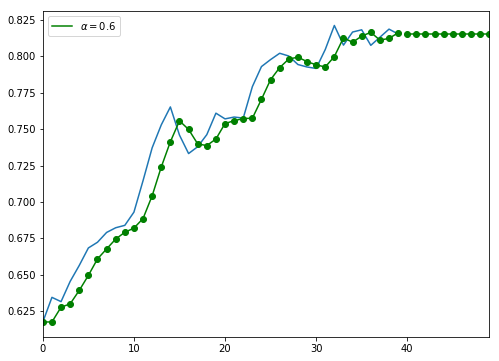

In [89]:
fig, ax = plt.subplots(figsize=(8,6))
ax=df_race['White Women'].plot()
fcast1.plot(marker='o', ax=ax, color='green', legend=True)
fit1.fittedvalues.plot(marker='o', ax=ax, color='green')
# plt.show()

### CI 90?

In [90]:
class RegressionResult:
    def __init__(self, inter, slope):
        self.inter = inter
        self.slope = slope
        pass
    
    def predict(self, xs):
        return self.slope * xs + self.inter
    
def RunLinearModel(df, dependent, independent='Years'):
    y = np.asarray(df_race[dependent])
    x = np.asarray(df_race[independent])
    inter, slope = thinkstats2.LeastSquares(x, y)
    _, fit_ys = thinkstats2.FitLine(x, inter, slope)
    
    result = RegressionResult(inter, slope)
    result.fittedvalues = fit_ys
    result.resid = thinkstats2.Residuals(x, y, inter, slope)
    return result

def SimulateResults(df, dependent, iters=101):
    results = RunLinearModel(df, dependent)
    fake = df.copy()
    
    result_seq = []

    for i in range(iters):
        fake[dependent] = results.fittedvalues + thinkstats2.Resample(results.resid)
        fake_results = RunLinearModel(fake, dependent)
        result_seq.append(fake_results)
    
    return result_seq

def GeneratePredictions(result_seq, years, add_resid=False):
    n = len(years)
    predict_seq = []
        
    for fake_results in result_seq:
        predict = fake_results.predict(years)
        if add_resid:
            predict = predict + thinkstats2.Resample(fake_results.resid, n)
        predict_seq.append(predict)
        
    return predict_seq

def PlotPredictions(df, years, iters=501, percent=90):
    dependent = 'Black Women'
    result_seq = SimulateResults(df, dependent, iters=iters)
    p = (100 - percent) / 2
    percents = p, 100-p
    
    predict_seq = GeneratePredictions(result_seq, years, True)
    low, high = thinkstats2.PercentileRows(predict_seq, percents)
    thinkplot.FillBetween(years, low, high, alpha=0.3, color='gray')
    
#     predict_seq = GeneratePredictions(result_seq, years, False)
#     low, high = thinkstats2.PercentileRows(predict_seq, percents)
#     thinkplot.FillBetween(years, low, high, alpha=0.5, color='blue')
    
    thinkplot.Plot(df_race['Years'], df_race[dependent], label='White Women', color='red')

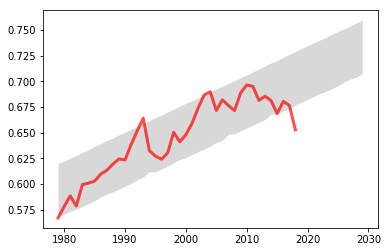

In [91]:
years = np.arange(np.min(df_race['Years']), 2030)
PlotPredictions(df_race, years=years)

## Why?

In [92]:
df_race.describe()

,Years,Asian Women,White Women,Black Women,Hispanic Women
count,40.000000,19.000000,40.000000,40.000000,40.000000
mean,1998.500000,0.894841,0.747639,0.645790,0.573031
std,11.690452,0.048242,0.061915,0.036539,0.027742
min,1979.000000,0.806268,0.617450,0.567114,0.526846
25%,1988.750000,0.856714,0.690677,0.622450,0.552212
50%,1998.500000,0.912727,0.757964,0.651079,0.564331
75%,2008.250000,0.928817,0.800735,0.677583,0.598299
max,2018.000000,0.957537,0.821262,0.696471,0.622081


In [93]:
df_race['white_women'] = df_race['White Women']
formula = 'white_women ~ Years'
model = smf.ols(formula, data=df_race)
result = model.fit()
result.params

Intercept   -9.367173
Years        0.005061
dtype: float64

In [94]:
result.fittedvalues

0     0.648945
1     0.654007
2     0.659068
3     0.664129
4     0.669190
5     0.674251
6     0.679313
7     0.684374
8     0.689435
9     0.694496
10    0.699557
11    0.704619
12    0.709680
13    0.714741
14    0.719802
15    0.724863
16    0.729925
17    0.734986
18    0.740047
19    0.745108
20    0.750169
21    0.755231
22    0.760292
23    0.765353
24    0.770414
25    0.775475
26    0.780537
27    0.785598
28    0.790659
29    0.795720
30    0.800781
31    0.805843
32    0.810904
33    0.815965
34    0.821026
35    0.826087
36    0.831149
37    0.836210
38    0.841271
39    0.846332
dtype: float64

In [95]:
# prstd, iv_l, iv_u = wls_prediction_std(res)
y = df_race['white_women']
x = df_race['Years']
y_true = result.fittedvalues

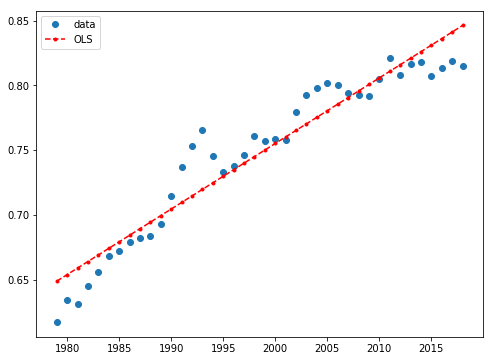

In [96]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="data")
ax.plot(x, result.fittedvalues, 'r--.', label="OLS")
# ax.plot(x, iv_u, 'r--')
# ax.plot(x, iv_l, 'r--')
ax.legend(loc='best');
# ax.axis('equal')

### thinkstats2 methods

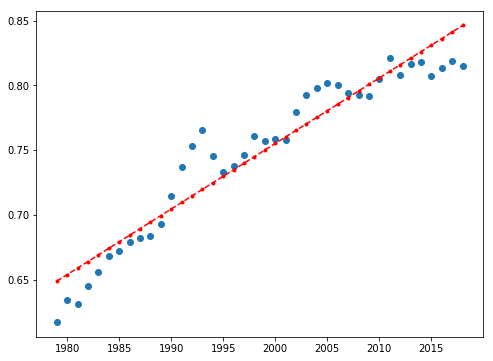

In [97]:
df_race['white_women'] = df_race['White Women']
y = np.asarray(df_race['white_women'])
x = np.asarray(df_race['Years'])

inter, slope = thinkstats2.LeastSquares(x, y)
fit_xs, fit_ys = thinkstats2.FitLine(x, inter, slope)
    
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label="data")
ax.plot(fit_xs, fit_ys, 'r--.', label="OLS")
# ax.axis('equal')